# Rf 2 0 3_Ranges
Addition and convolution: fitting and plotting in sub ranges




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:43 AM.</small></i>

In [1]:
from __future__ import print_function
import ROOT

Welcome to JupyROOT 6.18/03


Set up model
---------------------

Construct observables x

In [2]:
x = ROOT.RooRealVar("x", "x", -10, 10)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Construct gaussx(x,mx,1)

In [3]:
mx = ROOT.RooRealVar("mx", "mx", 0, -10, 10)
gx = ROOT.RooGaussian("gx", "gx", x, mx, ROOT.RooFit.RooConst(1))

px = 1 (flat in x)

In [4]:
px = ROOT.RooPolynomial("px", "px", x)

model = f*gx + (1-f)px

In [5]:
f = ROOT.RooRealVar("f", "f", 0., 1.)
model = ROOT.RooAddPdf(
    "model", "model", ROOT.RooArgList(gx, px), ROOT.RooArgList(f))

Generated 10000 events in (x,y) from p.d.f. model

In [6]:
modelData = model.generate(ROOT.RooArgSet(x), 10000)

Fit full range
---------------------------

Fit p.d.f to all data

In [7]:
r_full = model.fitTo(modelData, ROOT.RooFit.Save(ROOT.kTRUE))

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (px)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gx)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 f            5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 mx           0.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 

Fit partial range
----------------------------------

Define "signal" range in x as [-3,3]

In [8]:
x.setRange("signal", -3, 3)

[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'signal' created with bounds [-3,3]


Fit p.d.f only to data in "signal" range

In [9]:
r_sig = model.fitTo(modelData, ROOT.RooFit.Save(
    ROOT.kTRUE), ROOT.RooFit.Range("signal"))

[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_modelData) constructing test statistic for sub-range named signal
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'NormalizationRangeForsignal' created with bounds [-10,10]
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'fit_nll_model_modelData' created with bounds [-3,3]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_modelData) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (px)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gx)
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMI

Plot/print results
---------------------------------------

Make plot frame in x and add data and fitted model

In [10]:
frame = x.frame(ROOT.RooFit.Title("Fitting a sub range"))
modelData.plotOn(frame)
model.plotOn(
    frame, ROOT.RooFit.Range("Full"), ROOT.RooFit.LineStyle(
        ROOT.kDashed), ROOT.RooFit.LineColor(
            ROOT.kRed)) # Add shape in full ranged dashed
model.plotOn(frame)  # By default only fitted range is shown

<ROOT.RooPlot object ("frame_x_55657d7a88c0") at 0x55657d7a88c0>

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in range and no explicit norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) only plotting range 'Full'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_model_modelData'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in range and no explicit plot,norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) only plotting range 'fit_nll_model_modelData'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_model_modelData'


Print fit results

In [11]:
print("result of fit on all data ")
r_full.Print()
print("result of fit in in signal region (note increased error on signal fraction)")
r_sig.Print()

result of fit on all data 
result of fit in in signal region (note increased error on signal fraction)

  RooFitResult: minimized FCN value: 25939.4, estimated distance to minimum: 7.58116e-06
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                     f    5.0441e-01 +/-  6.32e-03
                    mx   -2.1605e-02 +/-  1.77e-02


  RooFitResult: minimized FCN value: 10339.5, estimated distance to minimum: 3.38988e-07
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                     f    4.9014e-01 +/-  1.62e-02
                    mx   -2.1701e-02 +/-  1.79e-02



Draw frame on canvas

In [12]:
c = ROOT.TCanvas("rf203_ranges", "rf203_ranges", 600, 600)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.4)
frame.Draw()

c.SaveAs("rf203_ranges.png")

Info in <TCanvas::Print>: png file rf203_ranges.png has been created


Draw all canvases 

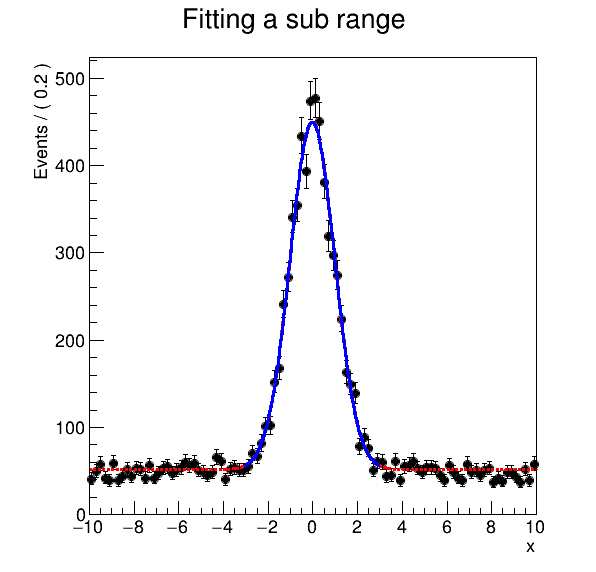

In [13]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()